In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
from dynamic_mode_decomposition import dmd

# Data

In [2]:
sales_train_evaluation = pd.read_csv('data/sales_train_evaluation.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

# Functions

In [3]:
def submission_format(predicted_sales_validation, predicted_sales_evaluation):
    submission = sample_submission.copy()
    num_forecasts = 28
    submission[submission.columns[1:num_forecasts+1]] = np.concatenate((predicted_sales_validation, predicted_sales_evaluation), axis=0)
    return submission

# Forecasting

In [4]:
num_days_evaluation = 1941
num_forecasts = 28
rank = 10

sales_validation = sales_train_evaluation.iloc[:,-num_days_evaluation:-num_forecasts].to_numpy()
predicted_sales = dmd.forecast(sales_validation, rank, num_forecasts)
predicted_sales[predicted_sales<0]=0 #set negative values to zero

# Error Analysis

In [5]:
true_sales = sales_train_evaluation.iloc[:,-num_forecasts:].to_numpy()
relative_error = LA.norm(true_sales-predicted_sales)/LA.norm(true_sales)
relative_error

0.6072295824759982

# Plots

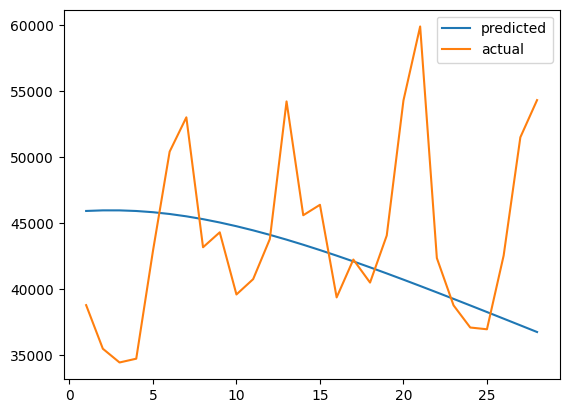

In [6]:
forecast_days = np.arange(1,num_forecasts+1)
plt.plot(forecast_days, predicted_sales.sum(axis=0), label = "predicted")
plt.plot(forecast_days, true_sales.sum(axis=0), label = "actual")
plt.legend()
plt.show()